<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 1</h1>

In questo notebook sono riportati gli esercizi da compiere con il codice fornito nella cartella **md.8**: i grafici presenti sono in python, ma nella cartella è presente anche un file .gnuplot contenente i comandi necessari per effettuare gli stessi plot in python. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare il kernel python corretto.

<center>

`module load python3/anaconda`
<center>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm

<center>
<h1 style="color:blue; font-size:55px;"> Esercizio 4.1</h1>

In [2]:
speed_nstep = np.loadtxt('scaling/scaling_nstep.dat')
speed_npart = np.loadtxt('scaling/scaling_npart.dat')

L'obiettivo di questo esercizio è quantificare lo speedup che si ha nell'eseguire in parallelo una simulazione di dinamica molecolare. Il programma che stiamo utilizzando per simulare un sistema di atomi di Neon è **LAMMPS** (Large-scale Atomic/Molecular Massively Parallel Simulator), che è un utile strumento computazionale in materia condensata. Una delle ottimizzazioni presenti nel codice utilizzato è la lista dei primi vicini, che consente di ridurre il numero di atomi considerati nel calcolo delle forze, mantenendo un'elevata accuratezza numerica.

<center>

![Simulazione LAMMPS](./animation/simulazione.gif)

In seguito sono riportati i risultati ottenuti sui computer di laboratorio, che hanno 6 cores fisici. Nei grafici l'asse x è il numero di cores utilizzati, mentre sull'asse y è riportato lo speed up, calcolato come

$$
s\left(t\right)\,=\,1\,-\,\frac{t_n}{t_1}
$$

dove $t_1$ è il tempo d'esecuzione del programma sul singolo processore. Ho provato a variare il numero totale di step (ossia la lunghezza della simulazione) ed il numero di atomi facenti parte il sistema, per vedere se questo avesse qualche influenza sull'efficienza della parallelizzazione.

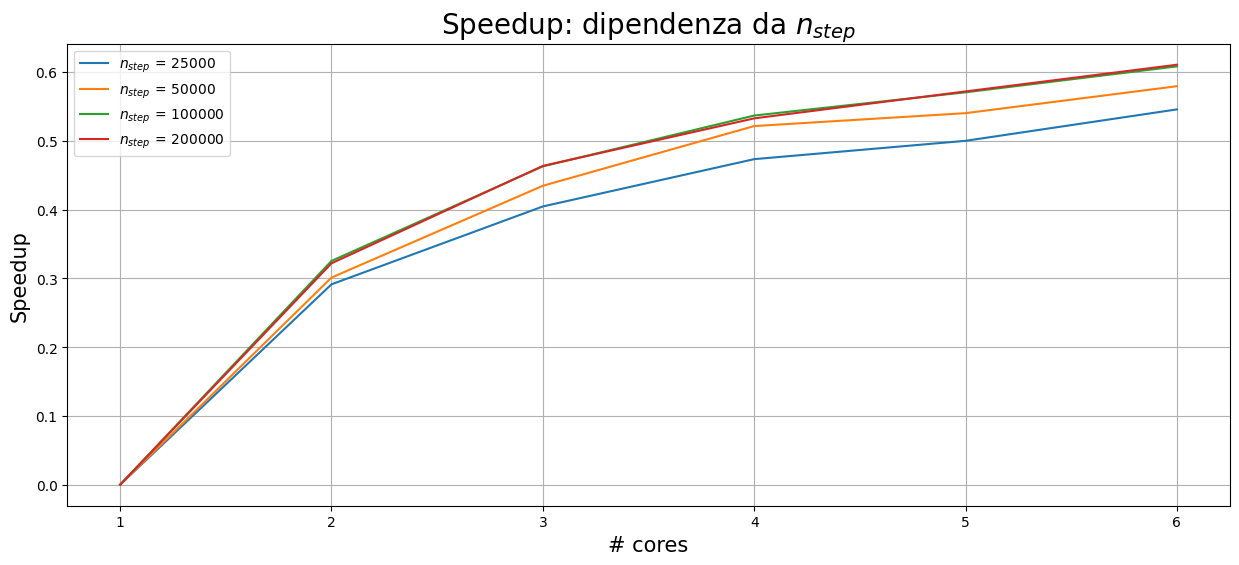

In [3]:
fig = plt.figure(figsize=(15, 6))

plt.plot(speed_nstep[:, 0], 1 - speed_nstep[:, 1]/speed_nstep[0, 1], label = r'$n_{step}\,=\,25000$')
plt.plot(speed_nstep[:, 0], 1 - speed_nstep[:, 2]/speed_nstep[0, 2], label = r'$n_{step}\,=\,50000$')
plt.plot(speed_nstep[:, 0], 1 - speed_nstep[:, 3]/speed_nstep[0, 3], label = r'$n_{step}\,=\,100000$')
plt.plot(speed_nstep[:, 0], 1 - speed_nstep[:, 4]/speed_nstep[0, 4], label = r'$n_{step}\,=\,200000$')
plt.xlabel(r"# cores", fontsize = 15)
plt.ylabel(r"Speedup", fontsize = 15)
plt.title(r"Speedup: dipendenza da $n_{step}$", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

Nel caso in cui ho variato la durata della simulazione ho notato come gli andamenti per centomila o duecentomila step temporali sono esattamente sovrapponibili, mentre le simulazioni più brevi si discostano maggiormente. Mi immagino che questo sia dovuto a dei processi la cui durata diventa trascurabile per simulazioni lunghe, ma che ha il suo peso nel caso di quelle corte.

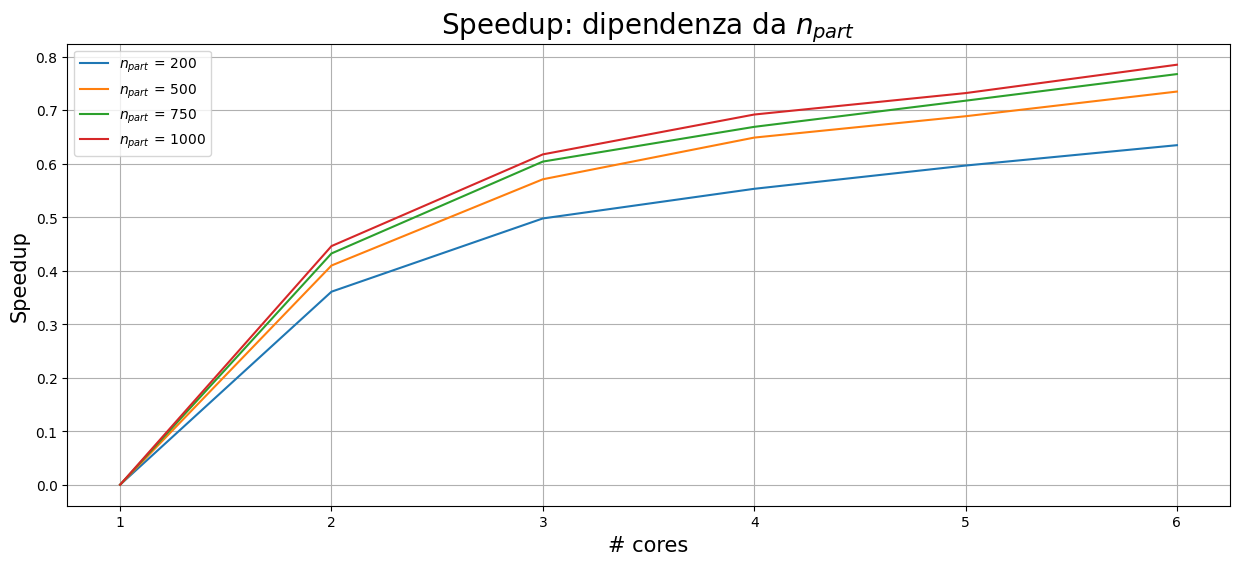

In [5]:
fig = plt.figure(figsize=(15, 6))

plt.plot(speed_npart[:, 0], 1 - speed_npart[:, 1]/speed_npart[0, 1], label = r'$n_{part}\,=\,200$')
plt.plot(speed_npart[:, 0], 1 - speed_npart[:, 2]/speed_npart[0, 2], label = r'$n_{part}\,=\,500$')
plt.plot(speed_npart[:, 0], 1 - speed_npart[:, 3]/speed_npart[0, 3], label = r'$n_{part}\,=\,750$')
plt.plot(speed_npart[:, 0], 1 - speed_npart[:, 4]/speed_npart[0, 4], label = r'$n_{part}\,=\,1000$')
plt.xlabel(r"# cores", fontsize = 15)
plt.ylabel(r"Speedup", fontsize = 15)
plt.title(r"Speedup: dipendenza da $n_{part}$", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

Nel caso di numero di particelle variabile non osservo lo stesso comportamento delineato per il caso precedente, ma si può comunque apprezzare come all'aumentare del numero di particelle (e quindi della lunghezza della simulazione, essendo il numero di step ora fissato) gli andamenti si facciano maggiormente confrontabili.